# Задание 1

### Импортируйте библиотеки pandas и numpy.

In [1]:
import numpy as np
import pandas as pd

### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 

In [2]:
from sklearnarn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston.data
data.shape

(506, 13)

In [6]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Создайте датафреймы X и y из этих данных.

In [7]:
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.shape

(506, 13)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
target = boston.target
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

### Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

### Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test, y_pred)

0.7112260057484908

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

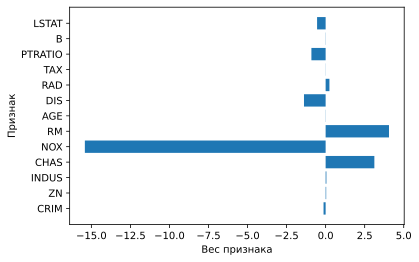

In [27]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [31]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

Text(0, 0.5, 'Признак')

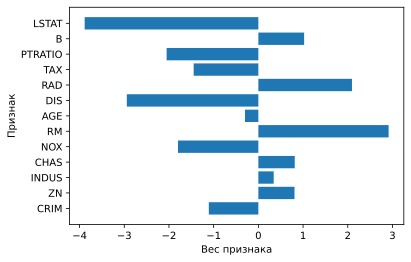

In [32]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

# Задание 2

### Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor()

### Сделайте агрумент n_estimators равным 1000,
### max_depth должен быть равен 12 и random_state сделайте равным 42.

In [36]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

### Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.


In [38]:
clf.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

### Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

In [39]:
y_pred_clf  = clf.predict(X_test)
r2_score(y_test, y_pred_clf)

0.87472606157312

#### Модель RandomForestRegressor работает лучше, чем LinearRegression, т.к. параметр оценки качества модели R2 выше.